# Experiment Report

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [2]:
# experiments = ['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87.json',
#  'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37.json',
#  'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70.json']

In [60]:
root = "/mnt/storage/log-experiments/"
experiments = [f for f in os.listdir(root+"logs/") if f[-4:] == 'json'][-5:-1]
results = {}
for exp in experiments:
    exp_name = exp[:-5]
    try:
        with open(root+"results/" + exp, 'r') as f:
            results[exp_name] = json.load(f)
    except:
        pass


In [61]:
experiments

['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-085629-89.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-160659-57.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-234733-03.json']

In [62]:
# list(results['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-090503-43'].items())[11][1]['rewards']

In [63]:
# results
experiments[0][:-5]

'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52'

In [64]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        if len(data['rewards']) >= 0: # manually remove outliers
            episode_count[exp_name].append(len(data['rewards']))

In [65]:
episode_count

{'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52': [49,
  66,
  35,
  40,
  33,
  72,
  102,
  118,
  103,
  67,
  41,
  43,
  47,
  44,
  72,
  24,
  66,
  42,
  29,
  43,
  47,
  67,
  56,
  67,
  38,
  28,
  59,
  76,
  45,
  41,
  55,
  56,
  48,
  69,
  29,
  33,
  33,
  81,
  51,
  52,
  76,
  43,
  44,
  59,
  29,
  92,
  39,
  28,
  74,
  44,
  59,
  29,
  61,
  27,
  47,
  51,
  62,
  34,
  56,
  48,
  85,
  102,
  42,
  41,
  32,
  34,
  50,
  111,
  34,
  45,
  63,
  50,
  66,
  40,
  35,
  37,
  33,
  29,
  30,
  50,
  25,
  48,
  32,
  41,
  121,
  136,
  46,
  48,
  71,
  32,
  29,
  34,
  59,
  64,
  31,
  39,
  62,
  40,
  40,
  38,
  29,
  150,
  61,
  44,
  82,
  89,
  40,
  44,
  50,
  53,
  53,
  33,
  57,
  40,
  81,
  72,
  29,
  62,
  39,
  58,
  43,
  40,
  41,
  38,
  27,
  38,
  53,
  77,
  58,
  40,
  41,
  71,
  49,
  72,
  49,
  68,
  48,
  31,
  119,
  43,
  69,
  50,
  80,
  42,
  60,
  33,
  34,
  20,
  61,
  61],
 'DQN_Malmo_Seq-MinecraftBasicNew

In [66]:
print("means")
for k,v in episode_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(np.std(v))

    

means
52.906666666666666
54.48
56.626666666666665
55.76

deviations
22.729231301466303
25.323959669319752
23.10715521699333
24.429403049058184


In [67]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for step in data['steps']:
            steps_count[exp_name].append(step)

In [68]:
len(steps_count[exp_name])

8364

In [69]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
47.28377016129032
49.768110621634854
44.67565340240169
44.898732663797226

deviations
26.60376289741759
25.98259793027939
24.73307329589644
24.602898884007157


In [70]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for reward in data['rewards']:
            rewards_count[exp_name].append(reward)

In [71]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
0.5102400453629031
0.4627055800293685
0.494165410878267
0.49407376853180285

deviations
0.5189740848735714
0.5216806458305305
0.5188603589803605
0.5187032530647315


In [72]:
experiments

['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-085629-89.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-160659-57.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-234733-03.json']

In [74]:
experiments_dp = {
    'focused experience sharing': experiments[3][:-5],
    'baseline': experiments[1][:-5],
    'regular experience sharing': experiments[0][:-5]
}

In [75]:
# experiments_dp = {
#     'focused experience sharing': 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87',
#     'baseline': 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37',
#     'regular experience sharing': 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70'
# }

In [76]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        if len(data['rewards']) >= 0: # manually remove outliers
            episode_count[exp_name].append(len(data['rewards']))

In [77]:
def plot(results, experiments, selected_experiments, colors):
    plt.figure(figsize=(10,4))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid()
    for exp_name, color in zip(selected_experiments, colors):
        exp_id = experiments[exp_name]
        sns.distplot(results[exp_id], label=exp_name, color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    # plt.ylim(0, 0.06)
        


In [78]:
colors = ['#003FFF', '#03ED3A', '#E8000B']

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


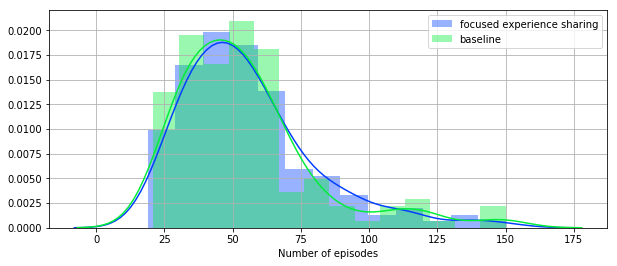

In [79]:
plot(episode_count, experiments_dp, ['focused experience sharing', 'baseline'], ['#003FFF', '#03ED3A'])
plt.savefig('res1.png', dpi=300)

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


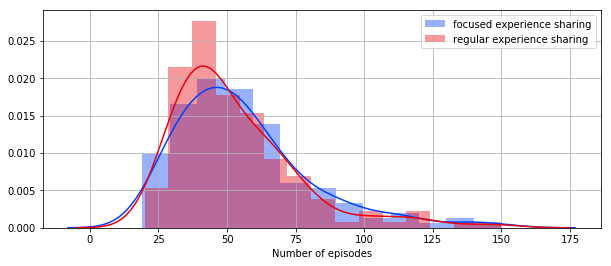

In [80]:
plot(episode_count, experiments_dp, ['focused experience sharing', 'regular experience sharing'], ['#003FFF', '#E8000B'])
plt.savefig('res2.png', dpi=300)

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


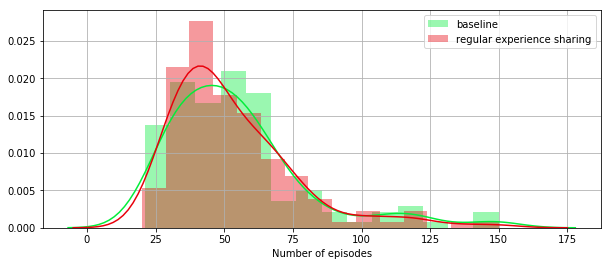

In [81]:
plot(episode_count, experiments_dp, ['baseline', 'regular experience sharing'], ['#03ED3A', '#E8000B'])
plt.savefig('res3.png', dpi=300)

In [82]:
# compare 3 in number of episodes, steps, and rewards

In [83]:
graph = {}

In [85]:
experiments.pop(2)

'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-160659-57.json'

In [86]:
experiments

['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-085629-89.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-234733-03.json']

In [87]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for step in data['steps']:
            steps_count[exp_name].append(step)
            
graph['Number of Steps - Mean'] = []
for k,v in steps_count.items():
    graph['Number of Steps - Mean'].append(np.mean(v))

graph['Number of Steps - Std Deviation'] = []
for k,v in steps_count.items():
    graph['Number of Steps - Std Deviation'].append(np.std(v))

    

In [88]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for reward in data['rewards']:
            rewards_count[exp_name].append(reward)
            
            
graph['Episode Total Reward - Mean'] = []
for k,v in rewards_count.items():
    graph['Episode Total Reward - Mean'].append(np.mean(v))

graph['Episode Total Reward - Std Deviation'] = []
for k,v in rewards_count.items():
    graph['Episode Total Reward - Std Deviation'].append(np.std(v))


In [89]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        if len(data['rewards']) >= 0: # manually remove outliers
            episode_count[exp_name].append(len(data['rewards']))
            
graph['Number of Episodes - Mean'] = []
for k,v in episode_count.items():
    graph['Number of Episodes - Mean'].append(np.mean(v))

graph['Number of Episodes - Std Deviation'] = []
for k,v in episode_count.items():
    graph['Number of Episodes - Std Deviation'].append(np.std(v))

In [90]:
graph

{'Number of Steps - Mean': [47.28377016129032,
  49.768110621634854,
  44.898732663797226],
 'Number of Steps - Std Deviation': [26.60376289741759,
  25.98259793027939,
  24.602898884007157],
 'Episode Total Reward - Mean': [0.5102400453629031,
  0.4627055800293685,
  0.49407376853180285],
 'Episode Total Reward - Std Deviation': [0.5189740848735714,
  0.5216806458305305,
  0.5187032530647315],
 'Number of Episodes - Mean': [52.906666666666666, 54.48, 55.76],
 'Number of Episodes - Std Deviation': [22.729231301466303,
  25.323959669319752,
  24.429403049058184]}

In [97]:
experiments_dp.keys()

dict_keys(['focused experience sharing', 'baseline', 'regular experience sharing'])

In [98]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
# df.columns=experiments_dp.keys()
df.columns=[ 'regular experience sharing',  'baseline','focused experience sharing']
df = df.round(decimals=2)
df.style.set_properties(**{'text-align': 'center'})
df.head(10)

,regular experience sharing,baseline,focused experience sharing
Number of Steps - Mean,47.28,49.77,44.90
Number of Steps - Std Deviation,26.60,25.98,24.60
Episode Total Reward - Mean,0.51,0.46,0.49
Episode Total Reward - Std Deviation,0.52,0.52,0.52
Number of Episodes - Mean,52.91,54.48,55.76
Number of Episodes - Std Deviation,22.73,25.32,24.43


In [99]:
df.head(10)

,regular experience sharing,baseline,focused experience sharing
Number of Steps - Mean,47.28,49.77,44.90
Number of Steps - Std Deviation,26.60,25.98,24.60
Episode Total Reward - Mean,0.51,0.46,0.49
Episode Total Reward - Std Deviation,0.52,0.52,0.52
Number of Episodes - Mean,52.91,54.48,55.76
Number of Episodes - Std Deviation,22.73,25.32,24.43


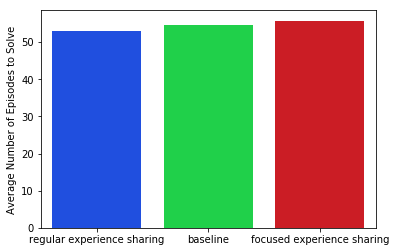

In [100]:
colors = ['#003FFF', '#03ED3A', '#E8000B']
sns.barplot(x=df.columns, y=df.loc['Number of Episodes - Mean'], palette=colors)
# plt.grid(which='major', axis='y')
plt.ylabel("Average Number of Episodes to Solve")
plt.savefig('res4.png', dpi=300)


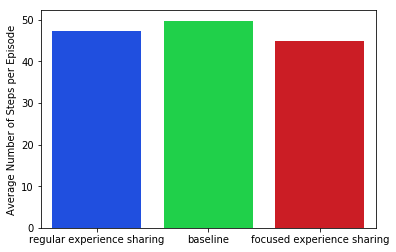

In [101]:
sns.barplot(x=df.columns, y=df.loc['Number of Steps - Mean'], palette=colors)
plt.ylabel("Average Number of Steps per Episode")
plt.savefig('res5.png', dpi=300)


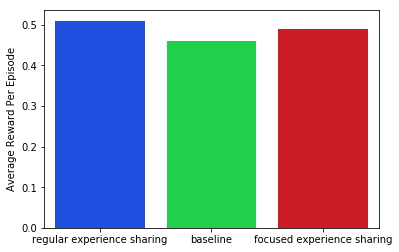

In [102]:
sns.barplot(x=df.columns, y=df.loc['Episode Total Reward - Mean'], palette=colors)
plt.ylabel("Average Reward Per Episode")
plt.savefig('res6.png', dpi=300)



In [96]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  focused experience sharing &  baseline &  regular experience sharing \\
\midrule
Number of Steps - Mean               &  47.28                      &  49.77    &  44.90                      \\
Number of Steps - Std Deviation      &  26.60                      &  25.98    &  24.60                      \\
Episode Total Reward - Mean          &   0.51                      &   0.46    &   0.49                      \\
Episode Total Reward - Std Deviation &   0.52                      &   0.52    &   0.52                      \\
Number of Episodes - Mean            &  52.91                      &  54.48    &  55.76                      \\
Number of Episodes - Std Deviation   &  22.73                      &  25.32    &  24.43                      \\
\bottomrule
\end{tabular}



In [103]:
def calc_stats(res):
    # get specific variable to compare
    all_values = list(res.items())
    samples = list(combinations(all_values, 2))
    for sample in samples:
        print(sample[0][0], "vs ",  sample[1][0])
        print("\n")
        print(stats.ks_2samp(sample[0][1], sample[1][1]))  
        print("\n")

calc_stats(episode_count)

DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52 vs  DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-085629-89


Ks_2sampResult(statistic=0.0733333333333333, pvalue=0.7999936509872291)


DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-012241-52 vs  DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-234733-03


Ks_2sampResult(statistic=0.09999999999999998, pvalue=0.42194314889685375)


DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-085629-89 vs  DQN_Malmo_Seq-MinecraftBasicNew-v0-20181021-234733-03


Ks_2sampResult(statistic=0.06666666666666665, pvalue=0.8820145641581103)


